## Analysis notebook for HW1

In [2]:
import os
import sys
import nstrace # nstrace module 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
### if no PyGnuplot module
!pip install PyGnuplot

  Created wheel for PyGnuplot: filename=PyGnuplot-0.11.16-cp36-none-any.whl size=4490 sha256=6fb80fbf465d0d3d52aa8965f4b915c1c490b26ad09d0240b32fcba0b32c67ca
  Stored in directory: /home/tkurihana/.cache/pip/wheels/df/4c/cb/d2da508081e226d79c0c27ebf2d9e975e6a840a9c9b8e02c40
Successfully built PyGnuplot


In [3]:
import PyGnuplot as gp

In [4]:
import pandas as pd

####  Practice: Read files

In [7]:
data = pd.read_table("./reno_reno/out_0.1Mb.tr",header=None,sep=' ',) 

In [10]:
data.columns = ['event', 'time', 'from node', 'to node', 
              'pkt type', 'pkt size', 'flags', 'fid', 
              'src addr', 'dst addr', 'seq num', 'pkt id']

In [11]:
data

,event,time,from node,to node,pkt type,pkt size,flags,fid,src addr,dst addr,seq num,pkt id
0,+,0.500000,0,1,tcp,40,-------,0,0.0,3.0,0,0
1,-,0.500000,0,1,tcp,40,-------,0,0.0,3.0,0,0
2,+,0.500000,4,1,tcp,40,-------,1,4.0,5.0,0,1
3,-,0.500000,4,1,tcp,40,-------,1,4.0,5.0,0,1
4,r,0.510032,0,1,tcp,40,-------,0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2077,+,10.476784,1,2,tcp,1000,-------,0,0.0,3.0,65,238
2078,r,10.482752,3,2,ack,40,-------,0,3.0,0.0,63,239
2079,+,10.482752,2,1,ack,40,-------,0,3.0,0.0,63,239
2080,-,10.482752,2,1,ack,40,-------,0,3.0,0.0,63,239


- Extract rows where loss/drop packet happened

In [16]:
drops = data[data['event'] == 'd']

In [17]:
drops

,event,time,from node,to node,pkt type,pkt size,flags,fid,src addr,dst addr,seq num,pkt id
170,d,1.202992,1,2,tcp,1000,-------,0,0.0,3.0,8,22
193,d,1.282992,1,2,tcp,1000,-------,0,0.0,3.0,10,25
216,d,1.362992,1,2,tcp,1000,-------,0,0.0,3.0,12,28
239,d,1.442992,1,2,tcp,1000,-------,0,0.0,3.0,14,31
262,d,1.522992,1,2,tcp,1000,-------,1,4.0,5.0,8,34
285,d,1.602992,1,2,tcp,1000,-------,1,4.0,5.0,10,37
308,d,1.682992,1,2,tcp,1000,-------,1,4.0,5.0,12,40
331,d,1.762992,1,2,tcp,1000,-------,1,4.0,5.0,14,43
354,d,1.842992,1,2,tcp,1000,-------,0,0.0,3.0,16,46
431,d,2.162992,1,2,tcp,1000,-------,1,4.0,5.0,16,55


- Extract number of "ack" packet (col name == 'pkt type')

In [18]:
acks = data[data['pkt type'] == 'ack']

In [19]:
acks

,event,time,from node,to node,pkt type,pkt size,flags,fid,src addr,dst addr,seq num,pkt id
17,+,0.573264,3,2,ack,40,-------,0,3.0,0.0,0,2
18,-,0.573264,3,2,ack,40,-------,0,3.0,0.0,0,2
20,+,0.576464,5,2,ack,40,-------,1,5.0,4.0,0,3
21,-,0.576464,5,2,ack,40,-------,1,5.0,4.0,0,3
22,r,0.583296,3,2,ack,40,-------,0,3.0,0.0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
2074,+,10.472720,3,2,ack,40,-------,0,3.0,0.0,63,239
2075,-,10.472720,3,2,ack,40,-------,0,3.0,0.0,63,239
2078,r,10.482752,3,2,ack,40,-------,0,3.0,0.0,63,239
2079,+,10.482752,2,1,ack,40,-------,0,3.0,0.0,63,239


- Get packet loss rate  
$$ \text{loss rate} = \frac{\text{\# of drops}}{\text{\# of acks}} $$

In [22]:
loss_rate = len(drops)/len(acks)*100 
loss_rate

1.407035175879397

- Get average bandwidth
$$ \text{Avg. Bandwidth} = \frac{ \text{\# of ack packets [bytes] * 8}}{ \text{time} } [bits / sec] $$ 

In [27]:
avg_bandwidth = acks[acks['event'] == 'r']['pkt size'].sum()/10
print(" Average bandwidth == {} [packets/sec]".format(avg_bandwidth))

 Average bandwidth == 1324.0 [packets/sec]


In [28]:
avg_bandwidth*8, 

165.5

- gnuplot with python

#### Workflow
1. Load 2 'tcp' files; 1 is for Node 1--> Node 4, 5 is Node 5--> Node 6.  
2. get df array which only has "time:" and 'cwnd:'
3. Save them in tmp files
4. Load these files by PyGnuplot and Draw

In [121]:
node1 = pd.read_table("./reno_reno/out_1Mb_5.tcp",header=None,sep="\s*", error_bad_lines=False)

/home/tkurihana/.conda/envs/tf-cpu/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [122]:
node1.drop(node1.columns[[ i for i in range(0,30,2)]], axis=1, inplace=True)

In [123]:
node1.columns= [
    "time", "saddr", "sport", "daddr", "dport", "maxseq", "hiack", "seqno", 
    "cwnd", "ssthresh", "dupacks", "rtt", "srtt", "rttvar", "bkoff"
]

In [124]:
node1

,time,saddr,sport,daddr,dport,maxseq,hiack,seqno,cwnd,ssthresh,dupacks,rtt,srtt,rttvar,bkoff
0,0.00000,4,0,5,0,-1,-1,0,1.000,20,0,0.00,0.00,12.000,1
1,0.34019,4,0,5,0,0,0,1,2.000,100,0,0.14,0.14,0.070,1
2,0.48269,4,0,5,0,2,1,3,3.000,100,0,0.14,0.14,0.052,1
3,0.48349,4,0,5,0,4,2,5,4.000,100,0,0.14,0.14,0.052,1
4,0.62518,4,0,5,0,6,3,7,5.000,100,0,0.14,0.14,0.040,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6063,20.61182,4,0,5,0,6274,6271,6275,78.331,43,0,0.14,0.14,0.007,1
6064,20.61342,4,0,5,0,6274,6272,6275,78.344,43,0,0.14,0.14,0.007,1
6065,20.61422,4,0,5,0,6274,6273,6275,78.357,43,0,0.14,0.14,0.007,1
6066,20.61582,4,0,5,0,6274,6274,6275,78.369,43,0,0.14,0.14,0.007,1


##### Get and Merge necessary columns

In [125]:
out1 = pd.merge(node1['time'], node1['cwnd'], left_index=True, right_index=True)

In [126]:
out1

,time,cwnd
0,0.00000,1.000
1,0.34019,2.000
2,0.48269,3.000
3,0.48349,4.000
4,0.62518,5.000
...,...,...
6063,20.61182,78.331
6064,20.61342,78.344
6065,20.61422,78.357
6066,20.61582,78.369


In [127]:
### Save to tmp file as txt
out1.to_csv("./reno_reno/_tmp_out_1Mb_1.out", sep=',', header=False)

In [128]:
### Plot all
gp.c('set title "cwnd N1 to N4 at 1Mb"; set xlabel "time [sec]"; set ylabel; "# of packets"')
gp.c('set datafile separator ","')
gp.c('set autoscale y')
gp.c('set autoscale x')
gp.c('plot "./reno_reno/_tmp_out_1Mb_1.out" u 2:3 w p')
gp.p('./out_0.1_.eps')

-------------------
### Part 1

#### 1.1
- reno-reno
- newreno-reno
- vegas-vegas
- newreno-vegas

#### 1.2
- single-reno
- single-newreno
- single-vegas

##### bandwidth 
0.01, 0.1, 0.5, 1, 5, 10, 100

###### 1.1

In [94]:
expdirname=[
    "reno_reno",
    "newreno_reno",
    "vegas_vegas",
    "newreno_vegas",
]

In [9]:
bandwidths = [ str(i) for i in range(1,11,1) ]

In [10]:
bandwidths

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

In [141]:
def compute_loss_bd(drops, acks, ctime=10.0): 
    # compute
    loss_rate = len(drops)/len(acks)*100 
    #avg_bandwidth = acks[acks['event'] == 'r']['pkt size'].sum()/ctime
    avg_bandwidth = acks[acks['event'] == '-']['pkt size'].sum()/ctime
    return loss_rate, avg_bandwidth

In [142]:
def get_trfile(filename):
    """compute average loss rate & bandwidth
        filename : directory + filename
        ctime : simulation computing time 10s for all test 
    """
    data = pd.read_table(filename,header=None,sep=' ',) 
    data.columns = ['event', 'time', 'from node', 'to node', 
              'pkt type', 'pkt size', 'flags', 'fid', 
              'src addr', 'dst addr', 'seq num', 'pkt id']
    drops = data[data['event'] == 'd']
    acks = data[data['pkt type'] == 'ack']
    return drops, acks

In [95]:
loss_rates = np.zeros((len(expdirname), len(bandwidths))).astype(np.float64)
avg_bds = np.zeros((len(expdirname), len(bandwidths))).astype(np.float64)
for idx, iexpdir in enumerate(expdirname):
    for jdx, ibandwidth in enumerate(bandwidths):
        
        # get file content
        basefname = 'out_'+ibandwidth+'Mb.tr'
        ifile = os.path.join('./'+iexpdir, basefname)
        drops, acks = get_tcpfile(ifile)
        
        loss_rate, avg_bandwidth = compute_loss_bd(drops, acks)
        loss_rates[idx, jdx] = loss_rate
        avg_bds[idx, jdx] = avg_bandwidth
    print(" ### END {} ###".format(iexpdir))

 ### END reno_reno ###
 ### END newreno_reno ###
 ### END vegas_vegas ###
 ### END newreno_vegas ###


- Check visualization

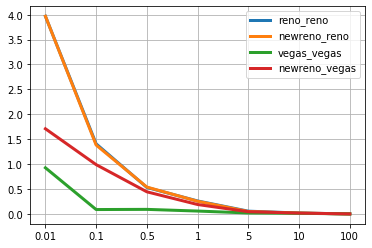

In [107]:
### drop rate
plt.figure()
for i in range(4):
    x = [i for i in range(len(bandwidths))]
    plt.plot(loss_rates[i, :], color='C{}'.format(i), label=expdirname[i], linewidth=3)
    plt.xticks(x, bandwidths)
plt.grid(True)
plt.legend()
plt.show()

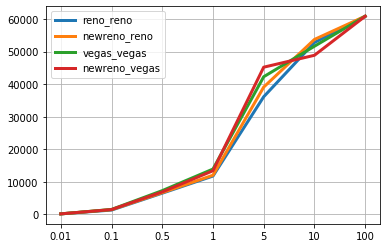

In [106]:
### avg bandwith
plt.figure()
for i in range(4):
    x = [i for i in range(len(bandwidths))]
    plt.plot(avg_bds[i, :], color='C{}'.format(i), label=expdirname[i], linewidth=3)
    plt.xticks(x, bandwidths)
plt.grid(True)
plt.legend()
plt.show()

##### save files

In [111]:
# column --> exp type
# row --> bandwidths
np.savetxt('part1_twoflows_loss.txt',loss_rates.T)

In [110]:
# column --> exp type
# row --> bandwidths
np.savetxt('part1_twoflows_bandwidth.txt',avg_bds.T)

##### 1.2

In [112]:
expdirname=[
    "single_reno",
    "single_newreno",
    "single_vegas",
]

In [113]:
loss_rates = np.zeros((len(expdirname), len(bandwidths))).astype(np.float64)
avg_bds = np.zeros((len(expdirname), len(bandwidths))).astype(np.float64)
for idx, iexpdir in enumerate(expdirname):
    for jdx, ibandwidth in enumerate(bandwidths):
        
        # get file content
        basefname = 'out_'+ibandwidth+'Mb.tr'
        ifile = os.path.join('./'+iexpdir, basefname)
        drops, acks = get_tcpfile(ifile)
        
        loss_rate, avg_bandwidth = compute_loss_bd(drops, acks)
        loss_rates[idx, jdx] = loss_rate
        avg_bds[idx, jdx] = avg_bandwidth
    print(" ### END {} ###".format(iexpdir))

 ### END single_reno ###
 ### END single_newreno ###
 ### END single_vegas ###


- check visualization

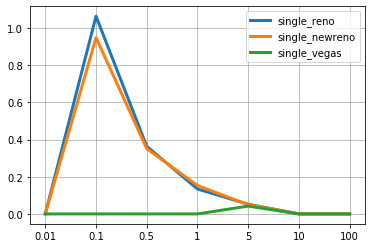

In [115]:
### drop rate
plt.figure()
for i in range(3):
    x = [i for i in range(len(bandwidths))]
    plt.plot(loss_rates[i, :], color='C{}'.format(i), label=expdirname[i], linewidth=3)
    plt.xticks(x, bandwidths)
plt.grid(True)
plt.legend()
plt.show()

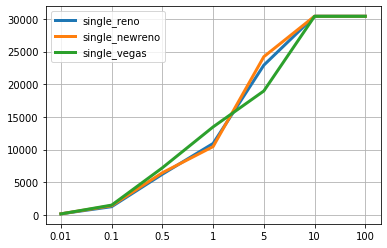

In [116]:
### avg bandwith
plt.figure()
for i in range(3):
    x = [i for i in range(len(bandwidths))]
    plt.plot(avg_bds[i, :], color='C{}'.format(i), label=expdirname[i], linewidth=3)
    plt.xticks(x, bandwidths)
plt.grid(True)
plt.legend()
plt.show()

In [117]:
# column --> exp type
# row --> bandwidths
np.savetxt('part1_singleflows_loss.txt',loss_rates.T)

In [118]:
# column --> exp type
# row --> bandwidths
np.savetxt('part1_singleflows_bandwidth.txt',avg_bds.T)

#### Figure by PyGnuplot

- Dual Flow

In [176]:
### Plot all
gp.c('set title "Average Packet Loss Rate" font "Helveticam, 18"; set xlabel "bottleneck bandwidths [Mb]"; set ylabel "Percent [%]"')
gp.c('set datafile separator "\t ,"')

gp.c('set size ratio 0.8')
gp.c('set grid')
gp.c('set tics font "Helvetica, 10"')
gp.c('set xrange [-0.5:7]')
gp.c('set xtics ("0.01" 0, "0.1" 1, "0.5" 2, "1" 3, "5" 4, "10" 5, "100" 6 )')
gp.c('plot   "./part1_twoflows_loss.txt" u 1 w lp  pt 7 ps 1.5 title "Reno-Reno"')
gp.c('replot "./part1_twoflows_loss.txt" u 2 w lp  pt 7 ps 1.5 title "NewReno-Reno"')
gp.c('replot "./part1_twoflows_loss.txt" u 3 w lp  pt 7 ps 1.5 title "Vegas-Vegas"')
gp.c('replot "./part1_twoflows_loss.txt" u 4 w lp  pt 7 ps 1.5 title "NewReno-Vegas"')
gp.p('part1_PacketLossRatio.ps')

In [195]:
### Plot all
gp.c('set title "Average Bandwidth" font "Helveticam, 18"; set xlabel "bottleneck bandwidths [Mb]"; set ylabel "Percent [%]"')
gp.c('set datafile separator "\t ,"')

gp.c('set size ratio 0.8')
gp.c('set grid')
gp.c('set key left top')
gp.c('set key inside')
gp.c('set tics font "Helvetica, 10"')
gp.c('set xrange [-0.5:7]')
gp.c('set yrange [0:70000]')
gp.c('set xtics ("0.01" 0, "0.1" 1, "0.5" 2, "1" 3, "5" 4, "10" 5, "100" 6 )')
gp.c('plot   "./part1_twoflows_bandwidth.txt" u 1 w lp  pt 7 ps 1.5 title "Reno-Reno"')
gp.c('replot "./part1_twoflows_bandwidth.txt" u 2 w lp  pt 7 ps 1.5 title "NewReno-Reno"')
gp.c('replot "./part1_twoflows_bandwidth.txt" u 3 w lp  pt 7 ps 1.5 title "Vegas-Vegas"')
gp.c('replot "./part1_twoflows_bandwidth.txt" u 4 w lp  pt 7 ps 1.5 title "NewReno-Vegas"')
gp.p('part1_Bandwidth.ps')

- Single Flow

In [185]:
### Plot all
gp.c('set title "Average Packet Loss Rate" font "Helveticam, 18"; set xlabel "bottleneck bandwidths [Mb]"; set ylabel "Percent [%]"')
gp.c('set datafile separator "\t ,"')

gp.c('set size ratio 0.8')
gp.c('set grid')
gp.c('set tics font "Helvetica, 10"')
gp.c('set xrange [-0.5:7]')
gp.c('set xtics ("0.01" 0, "0.1" 1, "0.5" 2, "1" 3, "5" 4, "10" 5, "100" 6 )')
gp.c('plot   "./part1_singleflows_loss.txt" u 1 w lp  pt 7 ps 1.5 title "Reno"')
gp.c('replot "./part1_singleflows_loss.txt" u 2 w lp  pt 7 ps 1.5 title "NewReno"')
gp.c('replot "./part1_singleflows_loss.txt" u 3 w lp  pt 7 ps 1.5 title "Vegas"')
gp.p('part1_PacketLossRatio_single.ps')

In [197]:
### Plot all
gp.c('set title "Average Bandwidth" font "Helveticam, 18"; set xlabel "bottleneck bandwidths [Mb]"; set ylabel "Percent [%]"')
gp.c('set datafile separator "\t ,"')

gp.c('set size ratio 0.8')
gp.c('set grid')
gp.c('set key left top')
gp.c('set key inside')
gp.c('set tics font "Helvetica, 10"')
gp.c('set xrange [-0.5:7]')
gp.c('set yrange [0:40000]')
gp.c('set xtics ("0.01" 0, "0.1" 1, "0.5" 2, "1" 3, "5" 4, "10" 5, "100" 6 )')
gp.c('plot   "./part1_singleflows_bandwidth.txt" u 1 w lp  pt 7 ps 1.5 title "Reno-Reno"')
gp.c('replot "./part1_singleflows_bandwidth.txt" u 2 w lp  pt 7 ps 1.5 title "NewReno-Reno"')
gp.c('replot "./part1_singleflows_bandwidth.txt" u 3 w lp  pt 7 ps 1.5 title "Vegas-Vegas"')
gp.p('part1_Bandwidth_single.ps')

----------------------------------------------

# 11/12 After modification network

-------------------
### Part 1

#### 1.1
- reno-reno
- newreno-reno
- vegas-vegas
- newreno-vegas

#### 1.2
- single-reno
- single-newreno
- single-vegas

##### bandwidth 
0.1, 1,2,4,6,8

##### Goal
Graph the *average packet loss rate* and *the average bandwidth*

----------------
#### 1.1

In [251]:
expdirname=[
    "reno_reno",
    "newreno_reno",
    "vegas_vegas",
    "newreno_vegas",
]

In [174]:
bandwidths = [ str(i) for i in [0.1, 1,2,4,6,8] ]
bandwidths

['0.1', '1', '2', '4', '6', '8']

In [144]:
def compute_average_loss_bd(drops, acks, ctime=20.0, unit=1.0, nflows=1, megabits=True):
    """column 6: size of packet [bytes]
    """
    bytes2bits = 8
    # compute
    loss_rate = len(drops)/len(acks)*100 
    avg_bandwidth = acks[acks['event'] == '-']['pkt size'].sum()*unit*bytes2bits/ctime/nflows
    if megabits:
        avg_bandwidth = avg_bandwidth /10**6
    return loss_rate, avg_bandwidth

In [145]:
def get_trfile(filename):
    """compute average loss rate & bandwidth
        filename : directory + filename
        ctime : simulation computing time 10s for all test 
    """
    data = pd.read_table(filename,header=None,sep=' ',) 
    data.columns = ['event', 'time', 'from node', 'to node', 
              'pkt type', 'pkt size', 'flags', 'fid', 
              'src addr', 'dst addr', 'seq num', 'pkt id']
    drops = data[data['event'] == 'd']
    #acks = data[data['pkt type'] == 'ack']
    datas = data[data['event'] == '-']
    return drops, datas

In [260]:
loss_rates = np.zeros((len(expdirname), len(bandwidths))).astype(np.float64)
avg_bds = np.zeros((len(expdirname), len(bandwidths))).astype(np.float64)
for idx, iexpdir in enumerate(expdirname):
    for jdx, ibandwidth in enumerate(bandwidths):
        
        # get file content
        basefname = 'out_'+ibandwidth+'Mb.tr'
        ifile = os.path.join('./'+iexpdir, basefname)
        drops, acks = get_trfile(ifile)
        
        loss_rate, avg_bandwidth = compute_average_loss_bd(
            drops, acks, ctime=20.0, unit=1.0, nflows=3, megabits=True
        )
        loss_rates[idx, jdx] = loss_rate
        avg_bds[idx, jdx] = avg_bandwidth
    print(" ### END {} ###".format(iexpdir))

 ### END reno_reno ###
 ### END newreno_reno ###
 ### END vegas_vegas ###
 ### END newreno_vegas ###


- Easy check by plt

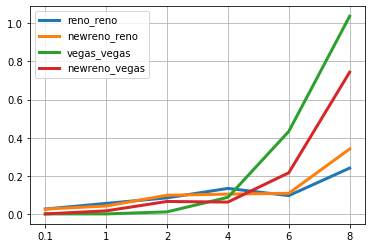

In [261]:
### drop rate
plt.figure()
for i in range(4):
    x = [i for i in range(len(bandwidths))]
    plt.plot(loss_rates[i, :], color='C{}'.format(i), label=expdirname[i], linewidth=3)
    plt.xticks(x, bandwidths)
plt.grid(True)
plt.legend()
plt.show()

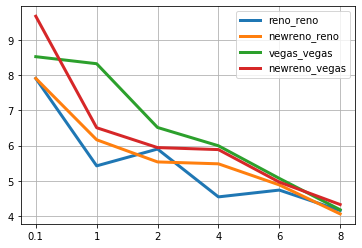

In [264]:
### avg bandwith
plt.figure()
for i in range(4):
    x = [i for i in range(len(bandwidths))]
    plt.plot(avg_bds[i, :], color='C{}'.format(i), label=expdirname[i], linewidth=3)
    plt.xticks(x, bandwidths)
plt.grid(True)
plt.legend()
plt.show()

In [265]:
# column --> exp type
# row --> bandwidths
np.savetxt('part1_twoflows_loss.txt',loss_rates.T)

In [266]:
# column --> exp type
# row --> bandwidths
np.savetxt('part1_twoflows_bandwidth.txt',avg_bds.T)

#### 1.2

In [172]:
expdirname=[
    "single_reno",
    "single_newreno",
    "single_vegas",
]

In [175]:
loss_rates = np.zeros((len(expdirname), len(bandwidths))).astype(np.float64)
avg_bds = np.zeros((len(expdirname), len(bandwidths))).astype(np.float64)
for idx, iexpdir in enumerate(expdirname):
    for jdx, ibandwidth in enumerate(bandwidths):
             
        # get file content
        basefname = 'out_'+ibandwidth+'Mb.tr'
        ifile = os.path.join('./'+iexpdir, basefname)
        drops, acks = get_trfile(ifile)
        
        loss_rate, avg_bandwidth = compute_average_loss_bd(
            drops, acks, ctime=20.0, unit=1.0, nflows=3, megabits=True
        )
        loss_rates[idx, jdx] = loss_rate
        avg_bds[idx, jdx] = avg_bandwidth
    print(" ### END {} ###".format(iexpdir))

 ### END single_reno ###
 ### END single_newreno ###
 ### END single_vegas ###


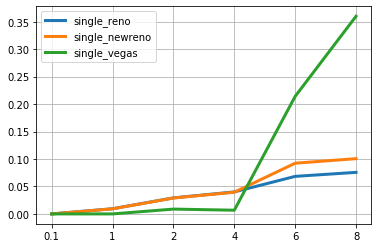

In [176]:
### drop rate
plt.figure()
for i in range(len(expdirname)):
    x = [i for i in range(len(bandwidths))]
    plt.plot(loss_rates[i, :], color='C{}'.format(i), label=expdirname[i], linewidth=3)
    plt.xticks(x, bandwidths)
plt.grid(True)
plt.legend()
plt.show()

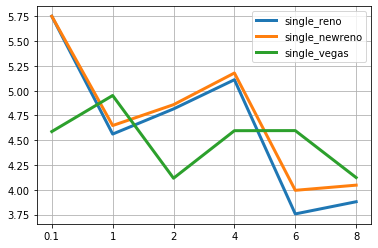

In [270]:
### avg bandwith
plt.figure()
for i in range(len(expdirname)):
    x = [i for i in range(len(bandwidths))]
    plt.plot(avg_bds[i, :], color='C{}'.format(i), label=expdirname[i], linewidth=3)
    plt.xticks(x, bandwidths)
plt.grid(True)
plt.legend()
plt.show()

In [454]:
# column --> exp type
# row --> bandwidths
np.savetxt('part1_singleflows_loss.txt',loss_rates.T)

In [455]:
# column --> exp type
# row --> bandwidths
np.savetxt('part1_singleflows_bandwidth.txt',avg_bds.T)

- Dual TCPs

In [456]:
### Plot all
gp.figure()
gp.c('set output "/dev/null"' )

gp.c('set title "Average Packet Loss Rate" font "Helveticam, 18"; set xlabel "Bottleneck Bandwidths [Mb]"; set ylabel "Percent [%]"')
gp.c('set datafile separator "\t ,"')

gp.c('set autoscale x')
gp.c('set size ratio 0.8')
gp.c('set key left top')
gp.c('set grid')
gp.c('set tics font "Helvetica, 10"')
gp.c('set xrange [-0.5:6]')
gp.c('set xtics ("0.1" 0, "1" 1, "2" 2, "4" 3, "6" 4, "8" 5 )')
gp.c('plot   "./part1_twoflows_loss.txt" u 1 w lp  pt 7 ps 1.5 title "Reno-Reno"')
gp.c('replot "./part1_twoflows_loss.txt" u 2 w lp  pt 7 ps 1.5 title "NewReno-Reno"')
gp.c('replot "./part1_twoflows_loss.txt" u 3 w lp  pt 7 ps 1.5 title "Vegas-Vegas"')
gp.c('replot "./part1_twoflows_loss.txt" u 4 w lp  pt 7 ps 1.5 title "NewReno-Vegas"')
gp.p('./fig/part1_PacketLossRatio.eps')

In [177]:
### Plot all
gp.figure()
gp.c('set title "Average Bandwidth" font "Helveticam, 18"; set xlabel "Bottleneck Bandwidths [Mb]"; set ylabel "Avg. Bandwidth [Mb]"')
gp.c('set datafile separator "\t ,"')

gp.c('set size ratio 0.8')
gp.c('set grid')
gp.c('set key right top')
gp.c('set key inside')
gp.c('set tics font "Helvetica, 10"')
gp.c('set xrange [-0.5:6]')
gp.c('set xtics ("0.1" 0, "1" 1, "2" 2, "4" 3, "6" 4, "8" 5 )')
gp.c('plot   "./part1_twoflows_bandwidth.txt" u 1 w lp  pt 7 ps 1.5 title "Reno-Reno"')
gp.c('replot "./part1_twoflows_bandwidth.txt" u 2 w lp  pt 7 ps 1.5 title "NewReno-Reno"')
gp.c('replot "./part1_twoflows_bandwidth.txt" u 3 w lp  pt 7 ps 1.5 title "Vegas-Vegas"')
gp.c('replot "./part1_twoflows_bandwidth.txt" u 4 w lp  pt 7 ps 1.5 title "NewReno-Vegas"')
gp.p('./fig/part1_Bandwidth.eps')

- Single TCP

In [178]:
### Plot all
gp.figure()
gp.c('set title "Average Packet Loss Rate" font "Helveticam, 18"; set xlabel "Bottleneck Bandwidths [Mb]"; set ylabel "Percent [%]"')
gp.c('set datafile separator "\t ,"')

gp.c('set size ratio 0.8')
gp.c('set grid')
gp.c('set key left top')
gp.c('set key inside')
gp.c('set tics font "Helvetica, 10"')
gp.c('set xrange [-0.5:6]')
gp.c('set xtics ("0.1" 0, "1" 1, "2" 2, "4" 3, "6" 4, "8" 5 )')
gp.c('plot   "./part1_singleflows_loss.txt" u 1 w lp  pt 7 ps 1.5 title "Reno"')
gp.c('replot "./part1_singleflows_loss.txt" u 2 w lp  pt 7 ps 1.5 title "NewReno"')
gp.c('replot "./part1_singleflows_loss.txt" u 3 w lp  pt 7 ps 1.5 title "Vegas"')
gp.p('part1_PacketLossRatio_single.eps')

In [179]:
### Plot all
gp.c('set title "Average Bandwidth" font "Helveticam, 18"; set xlabel "Bottleneck Bandwidths [Mb]"; set ylabel "Avg. Bandwidth [Mb]"')
gp.c('set datafile separator "\t ,"')

gp.c('set size ratio 0.8')
gp.c('set grid')
gp.c('set key right top')
gp.c('set key inside')
gp.c('set tics font "Helvetica, 10"')
gp.c('set xrange [-0.5:6]')
gp.c('set xtics ("0.1" 0, "1" 1, "2" 2, "4" 3, "6" 4, "8" 5 )')
gp.c('plot   "./part1_singleflows_bandwidth.txt" u 1 w lp  pt 7 ps 1.5 title "Reno"')
gp.c('replot "./part1_singleflows_bandwidth.txt" u 2 w lp  pt 7 ps 1.5 title "NewReno"')
gp.c('replot "./part1_singleflows_bandwidth.txt" u 3 w lp  pt 7 ps 1.5 title "Vegas"')
gp.p('part1_Bandwidth_single.eps')

----------------
### Part 2

#### 2.1
- reno-droptail
- reno-red
- sack1-droptail
- sack1-red

#### 2.2
- three UDP flow
- Goal 1 : Plot the throughput of all three flows.
- Goal 2 : Compute the average packet latency (end-to-end delay) for the packets for different flows  
- Goal 3 : plot Goal 2 result
##### Goal
influence of the queuing discipline 

-------------
#### 2.1 
- Avg. latency and bandwidth
- Cwnd figure

In [138]:
tcps = ['Reno', 'Sack1']
queues = ['DropTail', 'RED']

In [139]:
expdir='/home/tkurihana/class/networking/homework/practice/hw_test2/question1/DropOrRed'

In [146]:
loss_rates = np.zeros((len(tcps), len(queues))).astype(np.float64)
avg_bds = np.zeros((len(tcps), len(queues))).astype(np.float64)
for idx, itcp in enumerate(tcps):
    for jdx, iq in enumerate(queues):
        
        # get file content
        #basefname = 'out_'+ibandwidth+'Mb.tr'
        #ifile = os.path.join('./'+iexpdir, basefname)
        basefname='out_'+itcp+'_'+iq+'.tr'
        ifile = os.path.join(expdir, basefname)
        drops, acks = get_trfile(ifile)
        
        loss_rate, avg_bandwidth = compute_average_loss_bd(
            drops, acks, ctime=20.0, unit=1.0, nflows=2, megabits=True
        )
        loss_rates[idx, jdx] = loss_rate
        avg_bds[idx, jdx] = avg_bandwidth
        print(" ### END {} {} ###".format(itcp, iq))

 ### END Reno DropTail ###
 ### END Reno RED ###
 ### END Sack1 DropTail ###
 ### END Sack1 RED ###


In [147]:
loss_rates.shape

(2, 2)

In [148]:
expcomb = []
for idx, itcp in enumerate(tcps):
    for jdx, iq in enumerate(queues):
        expcomb +=[itcp+'-'+iq]

In [149]:
expcomb

['Reno-DropTail', 'Reno-RED', 'Sack1-DropTail', 'Sack1-RED']

In [150]:
loss_rates

array([[0.3694995 , 0.38129973],
       [0.34031414, 0.23609472]])

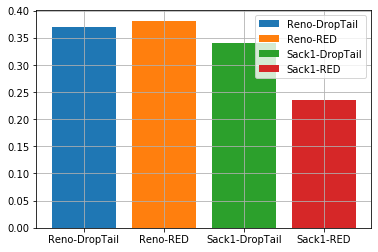

In [151]:
### drop rate
plt.figure()
idx = 0
for i in range(2):
    for j in range(2):
        plt.bar([idx],loss_rates[i, j], color='C{}'.format(idx), label=expcomb[idx], linewidth=3)
    
        idx +=1
plt.xticks([i for i  in range(len(expcomb))], expcomb)
plt.grid(True)
plt.legend()
plt.show()

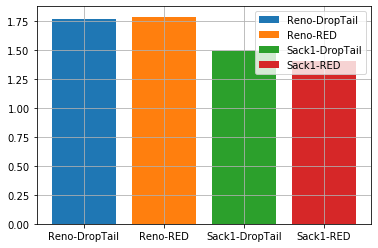

In [152]:
### band rate
plt.figure()
idx = 0
for i in range(2):
    for j in range(2):
        plt.bar([idx],avg_bds[i, j], color='C{}'.format(idx), label=expcomb[idx], linewidth=3)
    
        idx +=1
plt.xticks([i for i  in range(len(expcomb))], expcomb)
plt.grid(True)
plt.legend()
plt.show()

In [364]:
#x =np.array(['Reno-DropTail', 'Reno-RED', 'SACK-DropTail', 'SACK-RED']).reshape(1,4)

In [153]:
x = np.array([i for i in range(4)]).reshape(1,4)

In [154]:
# concate
sloss_rate = loss_rates.ravel()
sloss_rate = sloss_rate.reshape(1,4)
sloss = np.concatenate([x, sloss_rate], axis=0)

In [155]:
# concate
savg_bds = avg_bds.ravel()
savg_bds = savg_bds.reshape(1,4)
sbds = np.concatenate([x, savg_bds], axis=0)

In [156]:
# save loss rate and avg bandwidth
np.savetxt('part2_loss_sim1.txt',sloss.T)

In [157]:
# save loss rate and avg bandwidth
np.savetxt('part2_avgbd_sim1.txt',sbds.T)

gnuplot above figures

In [183]:
gp.figure()
#gp.c('red = "#FF0000"; green = "#00FF00"; blue = "#0000FF"; skyblue = "#87CEEB";')
gp.c('set title "Average Packet Loss Rate" font "Helveticam, 18"; set xlabel "TCP - Queue"; set ylabel "Percent [%]"')
gp.c('set style line 1 lc rgb "red"')
gp.c('set style line 2 lc rgb "blue"')
gp.c('set style line 3 lc rgb "green"')
gp.c('set style line 4 lc rgb "skyblue"')
gp.c('set style fill solid')
gp.c('set boxwidth 0.8')
#gp.c('set key left top')
#gp.c('set key inside')
gp.c('set key off')
gp.c('set tics font "Helvetica, 10"')
gp.c('set grid ytics')
gp.c('set xrange[-0.5:3.5]')
gp.c('set yrange[ 0.0:0.4]')
gp.c('set xtics 0,1,4')
gp.c('set xtics ("Reno-DropTail" 0, "Reno-RED" 1, "SACK-DropTail" 2, "SACK-RED" 3)')
gp.c('plot "./part2_loss_sim1.txt"   every ::0 ::0 using 1:2 with boxes ls 1')
gp.c('replot "./part2_loss_sim1.txt" every ::1 ::1 using 1:2 with boxes ls 2')
gp.c('replot "./part2_loss_sim1.txt" every ::2 ::2 using 1:2 with boxes ls 3')
gp.c('replot "./part2_loss_sim1.txt" every ::3 ::3 using 1:2 with boxes ls 4')
gp.p('/home/tkurihana/class/networking/homework/practice/hw_test2/question1/DropOrRed/avg_loss.eps')

In [184]:
gp.figure()
#gp.c('red = "#FF0000"; green = "#00FF00"; blue = "#0000FF"; skyblue = "#87CEEB";')
gp.c('set title "Average Bandwidth" font "Helveticam, 18"; set xlabel "TCP - Queue"; set ylabel "Avg. Bandwidth [Mb]"')
gp.c('set style line 1 lc rgb "red"')
gp.c('set style line 2 lc rgb "blue"')
gp.c('set style line 3 lc rgb "green"')
gp.c('set style line 4 lc rgb "skyblue"')
gp.c('set style fill solid')
gp.c('set boxwidth 0.8')
#gp.c('set key left top')
#gp.c('set key inside')
gp.c('set key off')
gp.c('set tics font "Helvetica, 10"')
gp.c('set grid ytics')
gp.c('set xrange[-0.5:3.5]')
gp.c('set yrange[ 0.0:2.1]')
gp.c('set xtics 0,1,4')
gp.c('set xtics ("Reno-DropTail" 0, "Reno-RED" 1, "SACK-DropTail" 2, "SACK-RED" 3)')
gp.c('plot "./part2_avgbd_sim1.txt"   every ::0 ::0 using 1:2 with boxes ls 1')
gp.c('replot "./part2_avgbd_sim1.txt" every ::1 ::1 using 1:2 with boxes ls 2')
gp.c('replot "./part2_avgbd_sim1.txt" every ::2 ::2 using 1:2 with boxes ls 3')
gp.c('replot "./part2_avgbd_sim1.txt" every ::3 ::3 using 1:2 with boxes ls 4')
gp.p('/home/tkurihana/class/networking/homework/practice/hw_test2/question1/DropOrRed/avg_bandwidth.eps')

##### Congenstion window

In [163]:
def compute_cwnd_fn(datadir, fname, ofname):
    #datadir='/home/tkurihana/class/networking/homework/practice/hw_test2/question1/DropOrRed'
    node1 = pd.read_table(os.path.join(datadir, fname),header=None,sep="\s*", error_bad_lines=False)
    node1.drop(node1.columns[[ i for i in range(0,30,2)]], axis=1, inplace=True) # adjust redundant column
    node1.columns= [
        "time", "saddr", "sport", "daddr", "dport", "maxseq", "hiack", "seqno", 
        "cwnd", "ssthresh", "dupacks", "rtt", "srtt", "rttvar", "bkoff"
    ]
    out1 = pd.merge(node1['time'], node1['cwnd'], left_index=True, right_index=True)
    ### Save to tmp file as txt and draw
    #os.remove(os.path.join(datadir+'fig', ofname))
    out1.to_csv(os.path.join(datadir+'/fig', ofname), sep=',', header=False)
    print(" Tmp plot file is ready {}/{}".format(datadir+'/fig', ofname))

In [164]:
datadir='/home/tkurihana/class/networking/homework/practice/hw_test2/question1/DropOrRed'
fname='out_Reno_DropTail.tcp'
ofname='out_Reno_DropTail.txt'
compute_cwnd_fn(datadir, fname, ofname)

 Tmp plot file is ready /home/tkurihana/class/networking/homework/practice/hw_test2/question1/DropOrRed/fig/out_Reno_DropTail.txt


/home/tkurihana/.conda/envs/tf-cpu/lib/python3.6/site-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/tkurihana/.conda/envs/tf-cpu/lib/python3.6/site-packages/pandas/io/parsers.py:2455: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
/home/tkurihana/.conda/envs/tf-cpu/lib/python3.6/site-packages/pandas/io/parsers.py:2458: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())


In [165]:
### Plot all
gp.figure()
gp.c('set title "Congestion Window"; set xlabel "time [sec]"; set ylabel; "# of packets"')
gp.c('set size ratio 0.8')
gp.c('set grid')
gp.c('set key right top')
gp.c('set key inside')
gp.c('set tics font "Helvetica, 10"')
gp.c('set datafile separator ","')
gp.c('set autoscale y')
gp.c('set autoscale x')
gp.c('plot "/home/tkurihana/class/networking/homework/practice/hw_test2/question1/DropOrRed/fig/out_Reno_DropTail.txt" using 2:3 w p title "cwnd"')
gp.p('/home/tkurihana/class/networking/homework/practice/hw_test2/question1/DropOrRed/fig/out_Reno_DropTail.eps')

In [166]:
bname="out_Reno_RED"
datadir='/home/tkurihana/class/networking/homework/practice/hw_test2/question1/DropOrRed'
fname=bname+'.tcp'
ofname=bname+'.txt'
compute_cwnd_fn(datadir, fname, ofname)

 Tmp plot file is ready /home/tkurihana/class/networking/homework/practice/hw_test2/question1/DropOrRed/fig/out_Reno_RED.txt


/home/tkurihana/.conda/envs/tf-cpu/lib/python3.6/site-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/tkurihana/.conda/envs/tf-cpu/lib/python3.6/site-packages/pandas/io/parsers.py:2455: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
/home/tkurihana/.conda/envs/tf-cpu/lib/python3.6/site-packages/pandas/io/parsers.py:2458: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())


In [167]:
### Plot all
gp.figure()
gp.c('set title "Congestion Window"; set xlabel "time [sec]"; set ylabel; "# of packets"')
gp.c('set size ratio 0.8')
gp.c('set grid')
gp.c('set key right top')
gp.c('set key inside')
gp.c('set tics font "Helvetica, 10"')
gp.c('set datafile separator ","')
gp.c('set autoscale y')
gp.c('set autoscale x')
gp.c('plot "/home/tkurihana/class/networking/homework/practice/hw_test2/question1/DropOrRed/fig/out_Reno_RED.txt" using 2:3 w p title "cwnd"')
gp.p('/home/tkurihana/class/networking/homework/practice/hw_test2/question1/DropOrRed/fig/out_Reno_RED.eps')

In [168]:
bname="out_Sack1_DropTail"
datadir='/home/tkurihana/class/networking/homework/practice/hw_test2/question1/DropOrRed'
fname=bname+'.tcp'
ofname=bname+'.txt'
compute_cwnd_fn(datadir, fname, ofname)

 Tmp plot file is ready /home/tkurihana/class/networking/homework/practice/hw_test2/question1/DropOrRed/fig/out_Sack1_DropTail.txt


/home/tkurihana/.conda/envs/tf-cpu/lib/python3.6/site-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/tkurihana/.conda/envs/tf-cpu/lib/python3.6/site-packages/pandas/io/parsers.py:2455: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
/home/tkurihana/.conda/envs/tf-cpu/lib/python3.6/site-packages/pandas/io/parsers.py:2458: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())


In [169]:
### Plot all
gp.figure()
gp.c('set title "Congestion Window"; set xlabel "time [sec]"; set ylabel; "# of packets"')
gp.c('set size ratio 0.8')
gp.c('set grid')
gp.c('set key right top')
gp.c('set key inside')
gp.c('set tics font "Helvetica, 10"')
gp.c('set datafile separator ","')
gp.c('set autoscale y')
gp.c('set autoscale x')
gp.c('plot "/home/tkurihana/class/networking/homework/practice/hw_test2/question1/DropOrRed/fig/out_Sack1_DropTail.txt" using 2:3 w p title "cwnd"')
gp.p('/home/tkurihana/class/networking/homework/practice/hw_test2/question1/DropOrRed/fig/out_Sack1_DropTail.eps')

In [170]:
bname="out_Sack1_RED"
datadir='/home/tkurihana/class/networking/homework/practice/hw_test2/question1/DropOrRed'
fname=bname+'.tcp'
ofname=bname+'.txt'
compute_cwnd_fn(datadir, fname, ofname)

 Tmp plot file is ready /home/tkurihana/class/networking/homework/practice/hw_test2/question1/DropOrRed/fig/out_Sack1_RED.txt


/home/tkurihana/.conda/envs/tf-cpu/lib/python3.6/site-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/tkurihana/.conda/envs/tf-cpu/lib/python3.6/site-packages/pandas/io/parsers.py:2455: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
/home/tkurihana/.conda/envs/tf-cpu/lib/python3.6/site-packages/pandas/io/parsers.py:2458: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())


In [171]:
### Plot all
gp.figure()
gp.c('set title "Congestion Window"; set xlabel "time [sec]"; set ylabel; "# of packets"')
gp.c('set size ratio 0.8')
gp.c('set grid')
gp.c('set key right top')
gp.c('set key inside')
gp.c('set tics font "Helvetica, 10"')
gp.c('set datafile separator ","')
gp.c('set autoscale y')
gp.c('set autoscale x')
gp.c('plot "/home/tkurihana/class/networking/homework/practice/hw_test2/question1/DropOrRed/fig/out_Sack1_RED.txt" using 2:3 w p title "cwnd"')
gp.p('/home/tkurihana/class/networking/homework/practice/hw_test2/question1/DropOrRed/fig/out_Sack1_RED.eps')

##### Part 2

In [5]:
### write fn to compute throughput
def compute_throughput(df, ctime=20.0, megabits=True, send=0, recv=1):
    pairs = df[(df['src addr'] == send) & (df['dst addr'] == recv)]
    th = pairs['pkt size'].sum()/ctime  # unit; bytes
    if megabits:
        th = th * 8 / 100000
    return th

In [185]:
### write fn to compute throughput
def compute_bandwidth(df, ctime=20.0, megabits=True, send=0, recv=1):
    bandwidth = df[df['event'] == '-']['pkt size'].sum()/ctime
    if megabits:
        bandwidth = bandwidth * 8 / 10**6
    return bandwidth

In [17]:
#end to enf latency
def original_compute_latency(df_send, df_arrv, send=0, recv=1):
    """Compute end 2 end (e2e) latency
    """
    latency = []
    max_pkid = df_arrv['pkt id'].max()
    #print(max_pkid)
    for ipkid in range(0,max_pkid+1,1):
        send_time = df_send[df_send['pkt id'] == ipkid]['time'].min()
        arrv_time = df_arrv[df_arrv['pkt id'] == ipkid]['time'].max()
        #print(send_time, arrv_time)
        latency.append(arrv_time-send_time)
    return np.mean(latency)

In [132]:
#end to enf latency
def compute_latency(df_send, df_arrv, send=0, recv=1):
    """Compute end 2 end (e2e) latency: 
    """
    latency = []
    max_pkid = df_arrv['pkt id'].max()
    #print(max_pkid)
    for ipkid in range(0,max_pkid+1,1):
        sends = df_send[df_send['pkt id'] == ipkid]
        arrvs = df_arrv[df_arrv['pkt id'] == ipkid]
        send_time = sends[sends['from node'] == send]['time']
        recv_time = arrvs[arrvs['to node'] == recv]['time']
        if not send_time.empty:
            if not recv_time.empty:
                latency.append(float(recv_time)-float(send_time))
    #return latency 
    return np.mean(latency)

In [7]:
def get_trfile2(filename, recv_list=[(0,1)],):
    """compute average loss rate & bandwidth
        filename : directory + filename
        ctime : simulation computing time 10s for all test 
    """
    data = pd.read_table(filename,header=None,sep=' ',) 
    data.columns = ['event', 'time', 'from node', 'to node', 
              'pkt type', 'pkt size', 'flags', 'fid', 
              'src addr', 'dst addr', 'seq num', 'pkt id']
    # throughput
    arrv_data = data[data['event'] == 'r'] # + in-queue / - out-queue / r arrive packet
    send_data = data[data['event'] == '-']
    throughput_list = []
    latency_list = []
    for (i,j) in recv_list:
        throughput_list.append(compute_throughput(arrv_data, ctime=20.0, megabits=True, send=i, recv=j))
        latency_list.append(compute_latency(send_data, arrv_data, send=i, recv=j))
        ii, jj = i,j
        print(" End send N.{} --> recv N.{}".format(ii+1,jj+1))
    return throughput_list , latency_list
    #, latency_list

In [18]:
def check_get_trfile2(filename, recv_list=[(0,1)],):
    """compute average loss rate & bandwidth
        filename : directory + filename
        ctime : simulation computing time 10s for all test 
    """
    data = pd.read_table(filename,header=None,sep=' ',) 
    data.columns = ['event', 'time', 'from node', 'to node', 
              'pkt type', 'pkt size', 'flags', 'fid', 
              'src addr', 'dst addr', 'seq num', 'pkt id']
    # throughput
    arrv_data = data[data['event'] == 'r'] # + in-queue / - out-queue / r arrive packet
    send_data = data[data['event'] == '-']
    throughput_list = []
    latency_list = []
    #for (i,j) in recv_list:
        #throughput_list.append(compute_throughput(arrv_data, ctime=20.0, megabits=True, send=i, recv=j))
    latency = original_compute_latency(send_data, arrv_data, send=0, recv=1)
    #    ii, jj = i,j
    #    print(" End send N.{} --> recv N.{}".format(ii+1,jj+1))
    #return throughput_list , latency_list
    return latency, data

In [ ]:
#end to enf latency
def middle_compute_latency(df_send, df_arrv, send=0, recv=1):
    """Compute end 2 end (e2e) latency: 
    """
    latency = []
    max_pkid = df_arrv['pkt id'].max()
    #print(max_pkid)
    for ipkid in range(0,max_pkid+1,1):
        # select packet
        sends = df_send[df_send['pkt id'] == ipkid]
        arrvs = df_arrv[df_arrv['pkt id'] == ipkid]
        
        # original
        #send_time = sends[sends['from node'] == send]['time']
        #recv_time = arrvs[arrvs['to node'] == recv]['time']
        
        # path 0
        send_time0 = sends[sends['from node'] == send]['time']
        recv_time0 = arrvs[arrvs['to node'] == 1]['time']
        
        # path 
        
        
        if not send_time.empty:
            if not recv_time.empty:
                latency.append(float(recv_time)-float(send_time))
    #return latency 
    return np.mean(latency)

In [ ]:
def get_trfile(filename, recv_list=[(0,1)],):
    """compute average loss rate & bandwidth
        filename : directory + filename
        ctime : simulation computing time 10s for all test 
    """
    data = pd.read_table(filename,header=None,sep=' ',) 
    data.columns = ['event', 'time', 'from node', 'to node', 
              'pkt type', 'pkt size', 'flags', 'fid', 
              'src addr', 'dst addr', 'seq num', 'pkt id']
    # throughput
    arrv_data = data[data['event'] == 'r'] # + in-queue / - out-queue / r arrive packet
    send_data = data[data['event'] == '-']
    throughput_list = []
    latency_list = []
    for (i,j) in recv_list:
        throughput_list.append(compute_throughput(arrv_data, ctime=20.0, megabits=True, send=i, recv=j))
        latency_list.append(middle_compute_latency(send_data, arrv_data, send=i, recv=j))
        ii, jj = i,j
        print(" End send N.{} --> recv N.{}".format(ii+1,jj+1))
    return throughput_list , latency_list
    #, latency_list

- DropTail

In [53]:
datadir='/home/tkurihana/class/networking/homework/practice/hw_test2/question2'
filename = os.path.join(datadir,'out_DropTail.tr')
throughputs, e2e_delays = get_trfile2(filename, [(0,3), (4,5), (6,7)])

 End send N.1 --> recv N.4
 End send N.5 --> recv N.6
 End send N.7 --> recv N.8


In [54]:
throughputs, e2e_delays

([6.72084, 6.6528, 6.58728],
 [0.07145599999999985, 0.07145599999999985, 0.07145599999999984])

In [52]:
throughputs, e2e_delays

([6.72084, 6.6528, 6.58728],
 [0.07145599999999985, 0.07145599999999985, 0.07145599999999984])

In [55]:
drop_throughputs = throughputs
drop_e2e_delays  = e2e_delays

- RED

In [56]:
datadir='/home/tkurihana/class/networking/homework/practice/hw_test2/question2'
filename = os.path.join(datadir,'out_RED.tr')
throughputs, e2e_delays = get_trfile2(filename, [(0,3), (4,5), (6,7)])

 End send N.1 --> recv N.4
 End send N.5 --> recv N.6
 End send N.7 --> recv N.8


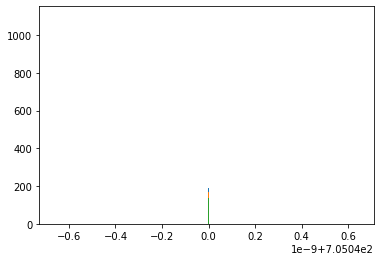

In [43]:
plt.figure()
for i in range(3): 
    plt.hist(np.asarray(e2e_delays[i])*10000, color='C{}'.format(i), bins=50 )
plt.show()

In [57]:
throughputs, e2e_delays

([6.72084, 6.6528, 6.58728],
 [0.07145599999999985, 0.07145599999999985, 0.07145599999999984])

In [58]:
red_throughputs = np.array([6.72084, 6.6528, 6.58728])
red_e2e_delays  = np.array([0.07050399999999984, 0.07050399999999983, 0.07050399999999983])

- Save for figures

In [78]:
col = np.asarray([i for i in range(3)])

In [79]:
ths = np.concatenate([col.reshape(1,3), np.asarray(drop_throughputs).reshape(1,3), 
                      np.asarray(red_throughputs).reshape(1,3)], axis=0)

In [80]:
### throughput
np.savetxt(os.path.join(datadir,'part2_q2_th.txt'),ths.T)

In [134]:
dly = np.concatenate([ np.asarray(drop_e2e_delays).reshape(1,3)*1000, 
                      np.asarray(red_e2e_delays).reshape(1,3)*1000], axis=0)

In [135]:
### throughput
np.savetxt(os.path.join(datadir,'part2_q2_dly.txt'),dly.T)

#### Visualization

In [338]:
gp.figure()
#gp.c('set datafile separator "\t"')
gp.c('set title "Throughputs"; set xlabel "Node"; set ylabel "Throughput [Mbps]"')
gp.c('set style data histogram')
gp.c('set style histogram cluster gap 1')
gp.c('set boxwidth 0.9')
gp.c('set key inside')
gp.c('set yrange[ 0.4:8]')
gp.c('set tics font "Helvetica, 10"')
gp.c('set grid ytics')
gp.c('set style fill solid')
gp.c('set xtics 0,1,3')
gp.c('set xtics ("N1 --> N4" 0, "N5 --> N6" 1, "N7 --> N8" 2)')
gp.c('plot "/home/tkurihana/class/networking/homework/practice/hw_test2/question2/part2_q2_th.txt" using 2:xtic(1) title "DropTail" blue')
gp.c('replot "/home/tkurihana/class/networking/homework/practice/hw_test2/question2/part2_q2_th.txt" using 3:xtic(1) title "RED" red')
gp.p('/home/tkurihana/class/networking/homework/practice/hw_test2/question2/fig/part2_q2_throughputs.eps')

In [341]:
gp.figure()
#gp.c('set datafile separator "\t"')
gp.c('set title "End to End Latency"; set xlabel "Node"; set ylabel "Latency [ms]"')
gp.c('set style data histogram')
gp.c('set style histogram cluster gap 1')
gp.c('set boxwidth 0.9')
gp.c('set key inside')
gp.c('set tics font "Helvetica, 10"')
gp.c('set grid ytics')
gp.c('set style fill solid')
gp.c('set xtics 0,1,3')
gp.c('set yrange[ 60:80]')
gp.c('set xtics ("N1 --> N4" 0, "N5 --> N6" 1, "N7 --> N8" 2)')
gp.c('plot "/home/tkurihana/class/networking/homework/practice/hw_test2/question2/part2_q2_dly.txt" using 2:xtic(1) title "DropTail" blue')
gp.c('replot "/home/tkurihana/class/networking/homework/practice/hw_test2/question2/part2_q2_dly.txt" using 3:xtic(1) title "RED" red')
gp.p('/home/tkurihana/class/networking/homework/practice/hw_test2/question2/fig/part2_q2_delay.eps')

--------------------------
##### Debugging for end to end latency computation by each flow

In [19]:
##### Debug
datadir='/home/tkurihana/class/networking/homework/practice/hw_test2/question2'
filename = os.path.join(datadir,'out_RED.tr')
latency, data = check_get_trfile2(filename)

In [471]:
a = data[data['event'] == 'r']
b= []
#for i in range(20):
a[a['pkt id'] == 100]

,event,time,from node,to node,pkt type,pkt size,flags,fid,src addr,dst addr,seq num,pkt id
780,r,0.233918,4,1,cbr,210,-------,1,4.0,5.0,33,100
1113,r,0.284086,1,2,cbr,210,-------,1,4.0,5.0,33,100
1188,r,0.294254,2,5,cbr,210,-------,1,4.0,5.0,33,100


##### memo
--> flow is connected 4 -->1-->2-->5; Thus end to end delay is  
$$" T(\text{arrv packet time at 5}) - T(\text{send packet time at 4}) "$$

In [20]:
arrv_data = data[data['event'] == 'r'] # + in-queue / - out-queue / r arrive packet
send_data = data[data['event'] == '-']

dfs = send_data[send_data['pkt id'] == 100]
dfa = arrv_data[arrv_data['pkt id'] == 100]

In [21]:
dfs

,event,time,from node,to node,pkt type,pkt size,flags,fid,src addr,dst addr,seq num,pkt id
716,-,0.223750,4,1,cbr,210,-------,1,4.0,5.0,33,100
782,-,0.233918,1,2,cbr,210,-------,1,4.0,5.0,33,100
1115,-,0.284086,2,5,cbr,210,-------,1,4.0,5.0,33,100


In [22]:
dfa

,event,time,from node,to node,pkt type,pkt size,flags,fid,src addr,dst addr,seq num,pkt id
780,r,0.233918,4,1,cbr,210,-------,1,4.0,5.0,33,100
1113,r,0.284086,1,2,cbr,210,-------,1,4.0,5.0,33,100
1188,r,0.294254,2,5,cbr,210,-------,1,4.0,5.0,33,100


In [23]:
e2e_delay = 0.294254 - 0.223750
e2e_delay

0.07050400000000001

Make a formula

In [24]:
stime = dfs['time'].min()
rtime = dfa['time'].max()
e2e = float(rtime) - float(stime)
e2e

0.07050400000000001

In [26]:
stime = dfs[dfs['from node'] == 4]['time']
rtime = dfa[dfa['to node'] == 5]['time']
float(rtime) - float(stime)
#rtime - stime

0.07050400000000001

In [491]:
aa = dfs[dfs['from node'] == 0]['time']
if not aa.empty:
    print('bad')
else:
    print('work well')

work well


----------------------------
### Additional analysis for Part2 Q.1: Each flow's bandwidth

In [186]:
def get_trfile3(filename, recv_list=[(0,1)],):
    """compute average loss rate & bandwidth
        filename : directory + filename
        ctime : simulation computing time 10s for all test 
    """
    data = pd.read_table(filename,header=None,sep=' ',) 
    data.columns = ['event', 'time', 'from node', 'to node', 
              'pkt type', 'pkt size', 'flags', 'fid', 
              'src addr', 'dst addr', 'seq num', 'pkt id']
    # bandwidth
    arrv_data = data[data['event'] == 'r'] # + in-queue / - out-queue / r arrive packet
    send_data = data[data['event'] == '-']
    bandwidth_list = []
    latency_list = []
    for (i,j) in recv_list:
        bandwidth_list.append(compute_bandwidth(send_data, ctime=20.0, megabits=True, send=i, recv=j))
        latency_list.append(compute_latency(send_data, arrv_data, send=i, recv=j))
        ii, jj = i,j
        print(" End send N.{} --> recv N.{}".format(ii+1,jj+1))
    return bandwidth_list , latency_list
    #, latency_list

- Reno-DropTail

In [187]:
datadir='/home/tkurihana/class/networking/homework/practice/hw_test2/question1/DropOrRed'
filename = os.path.join(datadir,'out_Reno_DropTail.tr')
bandwidth, e2e_delays = get_trfile3(filename, [(0,3), (4,5)])

 End send N.1 --> recv N.4
 End send N.5 --> recv N.6


In [188]:
bandwidth = throughputs

In [189]:
bandwidth, e2e_delays

([3.525936, 3.525936], [0.08557206646153855, 0.0799445656226697])

In [190]:
reno_droptail_bandwidth = bandwidth
reno_droptail_e2e_delays = e2e_delays

- Reno-RED

In [191]:
datadir='/home/tkurihana/class/networking/homework/practice/hw_test2/question1/DropOrRed'
filename = os.path.join(datadir,'out_Reno_RED.tr')
bandwidth, e2e_delays = get_trfile3(filename, [(0,3), (4,5)])

 End send N.1 --> recv N.4
 End send N.5 --> recv N.6


In [192]:
reno_red_bandwidth = bandwidth
reno_red_e2e_delays = e2e_delays

In [193]:
bandwidth, e2e_delays

([3.5736, 3.5736], [0.08332808927501499, 0.08139915949082746])

- SACK-DropTail

In [194]:
datadir='/home/tkurihana/class/networking/homework/practice/hw_test2/question1/DropOrRed'
filename = os.path.join(datadir,'out_Sack1_DropTail.tr')
bandwidth, e2e_delays = get_trfile3(filename, [(0,3), (4,5)])

 End send N.1 --> recv N.4
 End send N.5 --> recv N.6


In [195]:
sack_droptail_bandwidth = bandwidth
sack_droptail_e2e_delays = e2e_delays

In [196]:
bandwidth, e2e_delays

([2.98648, 2.98648], [0.08513260200668889, 0.07918439791356194])

- SACK-RED

In [197]:
datadir='/home/tkurihana/class/networking/homework/practice/hw_test2/question1/DropOrRed'
filename = os.path.join(datadir,'out_Sack1_RED.tr')
bandwidth, e2e_delays = get_trfile3(filename, [(0,3), (4,5)])

 End send N.1 --> recv N.4
 End send N.5 --> recv N.6


In [198]:
sack_red_bandwidth = bandwidth
sack_red_e2e_delays = e2e_delays

In [199]:
bandwidth, e2e_delays

([2.803216, 2.803216], [0.08348173800383876, 0.07847640850277268])

- Easy checkio

In [203]:
part2_ind_bandwidths = np.concatenate(
    [np.asarray(reno_droptail_bandwidth).reshape(1,2), np.asarray(reno_red_bandwidth).reshape(1,2),
    np.asarray(sack_droptail_bandwidth).reshape(1,2), np.asarray(sack_red_bandwidth).reshape(1,2)], axis=0
)

In [204]:
part2_ind_bandwidths

array([[3.525936, 3.525936],
       [3.5736  , 3.5736  ],
       [2.98648 , 2.98648 ],
       [2.803216, 2.803216]])

In [206]:
part2_ind_delays = np.concatenate(
    [np.asarray(reno_droptail_e2e_delays).reshape(1,2), np.asarray(reno_red_e2e_delays).reshape(1,2),
    np.asarray(sack_droptail_e2e_delays).reshape(1,2), np.asarray(sack_red_e2e_delays).reshape(1,2)], axis=0
)

In [229]:
part2_ind_delays = part2_ind_delays*1000

In [208]:
### save
np.savetxt(os.path.join(datadir, 'part2_ind_bandwidths.txt'),part2_ind_bandwidths.T)

In [230]:
### save
np.savetxt(os.path.join(datadir, 'part2_ind_delays.txt'),part2_ind_delays.T)

In [224]:
gp.figure()
#gp.c('set datafile separator "\t"')
gp.c('set title "Bandwidths" font "Helveticam, 18"; set xlabel "Node"; set ylabel "Bandwidth [Mbps]"')
gp.c('set style data histogram')
gp.c('set style histogram cluster gap 1')
gp.c('set boxwidth 0.9')
gp.c('set key inside')
gp.c('set key font ",10"')
gp.c('set tics font "Helvetica, 10"')
gp.c('set grid ytics')
gp.c('set style fill solid')
gp.c('set yrange[0.0:4]')
gp.c('set xrange[-0.5:2]')
gp.c('set xtics 0,1,3')
gp.c('set xtics ("N1 --> N4" 0, "N5 --> N6" 1)')
gp.c('plot "/home/tkurihana/class/networking/homework/practice/hw_test2/question1/DropOrRed/part2_ind_bandwidths.txt" using 2:xtic(1) title "Reno-DropTail" green')
gp.c('replot "/home/tkurihana/class/networking/homework/practice/hw_test2/question1/DropOrRed/part2_ind_bandwidths.txt" using 3:xtic(1) title "Reno-RED" red')
gp.c('replot "/home/tkurihana/class/networking/homework/practice/hw_test2/question1/DropOrRed/part2_ind_bandwidths.txt" using 4:xtic(1) title "SACK-DropTail" red')
gp.c('replot "/home/tkurihana/class/networking/homework/practice/hw_test2/question1/DropOrRed/part2_ind_bandwidths.txt" using 5:xtic(1) title "SACK-RED" red')
gp.p('/home/tkurihana/class/networking/homework/practice/hw_test2/question1/DropOrRed/fig/part2_each_bandwidths.eps')

In [375]:
gp.figure()
#gp.c('set datafile separator "\t"')
gp.c('set title "End to End Latency" font "Helveticam, 18"; set xlabel "Node"; set ylabel "Latency [ms]"')
gp.c('set style data histogram')
gp.c('set style histogram cluster gap 1')
gp.c('set boxwidth 0.9')
gp.c('set key inside')
gp.c('set key font ",10"')
gp.c('set tics font "Helvetica, 10"')
gp.c('set grid ytics')
gp.c('set style fill solid')
gp.c('set yrange[40.0:90]')
gp.c('set xrange[-0.5:2.5]')
gp.c('set xtics 0,1,3')
gp.c('set xtics ("N1 --> N4" 0, "N5 --> N6" 1)')
gp.c('plot "/home/tkurihana/class/networking/homework/practice/hw_test2/question1/DropOrRed/part2_ind_delays.txt" using 2:xtic(1) title "Reno-DropTail" green')
gp.c('replot "/home/tkurihana/class/networking/homework/practice/hw_test2/question1/DropOrRed/part2_ind_delays.txt" using 3:xtic(1) title "Reno-RED" red')
gp.c('replot "/home/tkurihana/class/networking/homework/practice/hw_test2/question1/DropOrRed/part2_ind_delays.txt" using 4:xtic(1) title "SACK-DropTail" red')
gp.c('replot "/home/tkurihana/class/networking/homework/practice/hw_test2/question1/DropOrRed/part2_ind_delays.txt" using 5:xtic(1) title "SACK-RED" red')
gp.p('/home/tkurihana/class/networking/homework/practice/hw_test2/question1/DropOrRed/fig/part2_each_delays.eps')

### Compute throughput every X second
X = 0.1

#### Question. 1

In [365]:
def compute_throughput_ps(filename, dt=0.1, ctime=20.0):
    """ Per X second
        compute average loss rate & bandwidth
        filename : directory + filename
        ctime : simulation computing time 10s for all test 
    """
    
    ### write fn to compute throughput
    def _compute_throughput_ps(df,dt, stime=0, ctime=20.0, megabits=True, send=0, recv=1):
        th = df[['time','pkt size']]# unit; bytes
        
        # delta t
        dx = 0.0
        time_list = []
        throughput_list = []
        while dx <= ctime:
            _packet = th[(th['time']>= dx) & (th['time'] < dt+dx) ]['pkt size'].sum()
            if megabits:
                pkt = float(_packet) * 8 / 100000
            else:
                pkt = float(_packet)
            throughput_list.append(pkt/dt)
            time_list.append(dx)
            
            ## increment
            dx += dt
        time_array = np.asarray(time_list).reshape(1,len(time_list))
        throughput_array = np.asarray(throughput_list).reshape(1,len(time_list))
        
        ths = np.concatenate([time_array, throughput_array], axis=0)
        return ths
    
    data = pd.read_table(filename,header=None,sep=' ',) 
    data.columns = ['event', 'time', 'from node', 'to node', 
              'pkt type', 'pkt size', 'flags', 'fid', 
              'src addr', 'dst addr', 'seq num', 'pkt id']
    # throughput
    arrv_data = data[data['event'] == 'r'] # + in-queue / - out-queue / r arrive packet
    #send_data = data[data['event'] == '-']
    throughput = _compute_throughput_ps(arrv_data, dt=dt, ctime=ctime, megabits=True)
    return throughput

- Reno DropTail

In [366]:
datadir='/home/tkurihana/class/networking/homework/practice/hw_test2/question1/DropOrRed'
filename = os.path.join(datadir,'out_Reno_DropTail.tr')
df_throughput_ps = compute_throughput_ps(filename, dt=0.1)

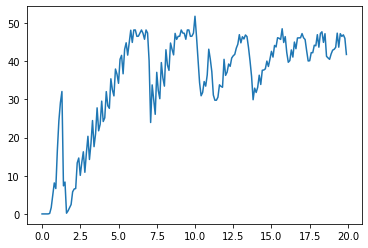

In [367]:
plt.plot(df_throughput_ps[0], df_throughput_ps[1])

In [303]:
np.savetxt(os.path.join(datadir, 'throughput_per100ms.txt'), df_throughput_ps.T)

In [371]:
### Plot all
gp.figure()
gp.c('set y2tics')
gp.c('set title "Throughput vs Congestion Window" font "Helveticam, 15"; set xlabel "time [sec]"; set ylabel "# of packets"; set y2label "Throughput [Mb]"')
gp.c('set size ratio 0.8')
gp.c('set grid')
gp.c('set key right top')
gp.c('set key inside')
gp.c('set tics font "Helvetica, 10"')
gp.c('set datafile separator "\t ,"')
gp.c('set yrange[0:40]')
gp.c('set y2range[0:8]')
#gp.c('set autoscale y')
#gp.c('set autoscale x')
gp.c('plot "/home/tkurihana/class/networking/homework/practice/hw_test2/question1/DropOrRed/fig/out_Reno_DropTail.txt" using 2:3 axis x1y1 w lp title "cwnd" rgb "red"')
gp.c('replot "/home/tkurihana/class/networking/homework/practice/hw_test2/question1/DropOrRed/throughput_per100ms.txt" using 1:2 axis x1y2 w lp title "throughput"')
gp.p('/home/tkurihana/class/networking/homework/practice/hw_test2/question1/DropOrRed/fig/thpt_cwnd_Reno_DropTail.eps')

- Reno RED

In [323]:
datadir='/home/tkurihana/class/networking/homework/practice/hw_test2/question1/DropOrRed'
filename = os.path.join(datadir,'out_Reno_RED.tr')
df_throughput_ps = compute_throughput_ps(filename, dt=0.1)

In [324]:
np.savetxt(os.path.join(datadir, 'reno_red_throughput_per100ms.txt'), df_throughput_ps.T)

In [370]:
### Plot all
gp.figure()
gp.c('set y2tics')
gp.c('set title "Throughput vs Congestion Window" font "Helveticam, 15"; set xlabel "time [sec]"; set ylabel "# of packets"; set y2label "Throughput [Mb]"')
gp.c('set size ratio 0.8')
gp.c('set grid')
gp.c('set key right top')
gp.c('set key inside')
gp.c('set tics font "Helvetica, 10"')
gp.c('set datafile separator "\t ,"')
gp.c('set yrange[0:40]')
gp.c('set y2range[0:8]')
#gp.c('set autoscale y')
#gp.c('set autoscale x')
gp.c('plot "/home/tkurihana/class/networking/homework/practice/hw_test2/question1/DropOrRed/fig/out_Reno_RED.txt" using 2:3 axis x1y1 w lp title "cwnd" rgb "red"')
gp.c('replot "/home/tkurihana/class/networking/homework/practice/hw_test2/question1/DropOrRed/reno_red_throughput_per100ms.txt" using 1:2 axis x1y2 w lp title "throughput"')
gp.p('/home/tkurihana/class/networking/homework/practice/hw_test2/question1/DropOrRed/fig/thpt_cwnd_Reno_RED.eps')

- Sack-DropTail

In [326]:
datadir='/home/tkurihana/class/networking/homework/practice/hw_test2/question1/DropOrRed'
filename = os.path.join(datadir,'out_Sack1_DropTail.tr')
df_throughput_ps = compute_throughput_ps(filename, dt=0.1)

In [327]:
np.savetxt(os.path.join(datadir, 'sack_droptail_throughput_per100ms.txt'), df_throughput_ps.T)

In [369]:
### Plot all
gp.figure()
gp.c('set y2tics')
gp.c('set title "Throughput vs Congestion Window" font "Helveticam, 15"; set xlabel "time [sec]"; set ylabel "# of packets"; set y2label "Throughput [Mb]"')
gp.c('set size ratio 0.8')
gp.c('set grid')
gp.c('set key right top')
gp.c('set key inside')
gp.c('set tics font "Helvetica, 10"')
gp.c('set datafile separator "\t ,"')
gp.c('set yrange[0:40]')
gp.c('set y2range[0:8]')
#gp.c('set autoscale y')
#gp.c('set autoscale x')
gp.c('plot "/home/tkurihana/class/networking/homework/practice/hw_test2/question1/DropOrRed/fig/out_Sack1_DropTail.txt" using 2:3 axis x1y1 w lp title "cwnd" rgb "red"')
gp.c('replot "/home/tkurihana/class/networking/homework/practice/hw_test2/question1/DropOrRed/sack_droptail_throughput_per100ms.txt" using 1:2 axis x1y2 w lp title "throughput"')
gp.p('/home/tkurihana/class/networking/homework/practice/hw_test2/question1/DropOrRed/fig/thpt_cwnd_sack_droptail.eps')

- Sack-RED

In [333]:
datadir='/home/tkurihana/class/networking/homework/practice/hw_test2/question1/DropOrRed'
filename = os.path.join(datadir,'out_Sack1_RED.tr')
df_throughput_ps = compute_throughput_ps(filename, dt=0.1)

In [334]:
np.savetxt(os.path.join(datadir, 'sack_red_throughput_per100ms.txt'), df_throughput_ps.T)

In [368]:
### Plot all
gp.figure()
gp.c('set y2tics')
gp.c('set title "Throughput vs Congestion Window" font "Helveticam, 15"; set xlabel "time [sec]"; set ylabel "# of packets"; set y2label "Throughput [Mb]"')
gp.c('set size ratio 0.8')
gp.c('set grid')
gp.c('set key right top')
gp.c('set key inside')
gp.c('set tics font "Helvetica, 10"')
gp.c('set datafile separator "\t ,"')
gp.c('set yrange[0:40]')
gp.c('set y2range[0:8]')
#gp.c('set autoscale y')
#gp.c('set autoscale x')
gp.c('plot "/home/tkurihana/class/networking/homework/practice/hw_test2/question1/DropOrRed/fig/out_Sack1_RED.txt" using 2:3 axis x1y1 w lp title "cwnd" rgb "red"')
gp.c('replot "/home/tkurihana/class/networking/homework/practice/hw_test2/question1/DropOrRed/sack_red_throughput_per100ms.txt" using 1:2 axis x1y2 w lp title "throughput"')
gp.p('/home/tkurihana/class/networking/homework/practice/hw_test2/question1/DropOrRed/fig/thpt_cwnd_sack_red.eps')

------------------------
### Q.2 part2 [3 UDPs] Make plot for each UDP flow in time-series

In [346]:
datadir='/home/tkurihana/class/networking/homework/practice/hw_test2/question2'
filename = os.path.join(datadir,'out_DropTail.tr')
df_throughput_ps = compute_throughput_ps(filename, dt=0.1, ctime=10)

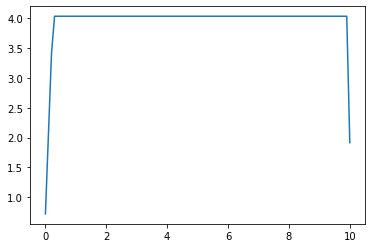

In [347]:
plt.plot(df_throughput_ps[0], df_throughput_ps[1])

In [358]:
datadir='/home/tkurihana/class/networking/homework/practice/hw_test2/question2'
filename = os.path.join(datadir,'out_RED.tr')
df_throughput_ps = compute_throughput_ps(filename, dt=1, ctime=10)

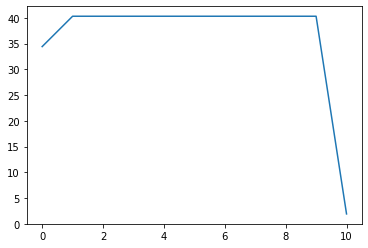

In [359]:
plt.plot(df_throughput_ps[0], df_throughput_ps[1])

In [ ]:
def compute_throughput_latency_ps(filename, dt=0.1):
    """ Per X second
        compute average loss rate & bandwidth
        filename : directory + filename
        ctime : simulation computing time 10s for all test 
    """
    
    ### write fn to compute throughput
    def _compute_throughput_ps(df,dt, stime=0, ctime=20.0, megabits=True, send=0, recv=1):
        th = df[['time','pkt size']]# unit; bytes
        
        # delta t
        dx = 0.0
        time_list = []
        throughput_list = []
        while dx <= ctime:
            _packet = th[(th['time']>= dx) & (th['time'] < dt+dx) ]['pkt size'].sum()
            if megabits:
                pkt = float(_packet) * 8 / 100000
            else:
                pkt = float(_packet)
            throughput_list.append(pkt)
            time_list.append(dx)
            
            ## increment
            dx += dt
        time_array = np.asarray(time_list).reshape(1,len(time_list))
        throughput_array = np.asarray(throughput_list).reshape(1,len(time_list))
        
        ths = np.concatenate([time_array, throughput_array], axis=0)
        return ths
    
    data = pd.read_table(filename,header=None,sep=' ',) 
    data.columns = ['event', 'time', 'from node', 'to node', 
              'pkt type', 'pkt size', 'flags', 'fid', 
              'src addr', 'dst addr', 'seq num', 'pkt id']
    # throughput
    arrv_data = data[data['event'] == 'r'] # + in-queue / - out-queue / r arrive packet
    #send_data = data[data['event'] == '-']
    throughput = _compute_throughput_ps(arrv_data, dt=dt, ctime=20.1, megabits=True)
    return throughput